# 2019 plots for Rosie Point Loma

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42



## Import data into Pandas

In [7]:
datapath="/Users/zanejobe/Dropbox/20PublishedPapers/2019 Fryer_TDR_Thinning Rates/DataAndCode/Seaborn/"
filename="PLDataLOGGED_TH_TR_GS_FR_ElementNum.txt"
filenamecolor="PLDataLOGGED_TH_TR_GS_FR_ElementNum_RGB_values.txt"
# Columns are:
# thickness (m), thinning rate (cm/m), grain size (psi), fining rate (psi/m), lobe element number 

df = pd.read_csv(datapath + filename, header=None, engine='python', sep='  ', names=['th', 'tr', 'gs', 'fr', 'group']) 
df.head()

,th,tr,gs,fr,group
0,-0.818472,-2.207100,-2.089759,-2.663333,2.0
1,-0.505998,-2.589492,-2.033797,-2.616388,2.0
2,-0.712312,-2.462010,-2.144656,-1.611153,2.0
3,-0.271365,-2.207097,-1.917575,-2.258018,2.0
4,-0.486173,-2.700731,-2.103353,-1.947841,2.0


## Make a basic plot

[Text(0, 0.0, '0.001'),
 Text(0, 0.2, '0.01'),
 Text(0, 0.4, '0.1'),
 Text(0, 0.6000000000000001, '1.0')]

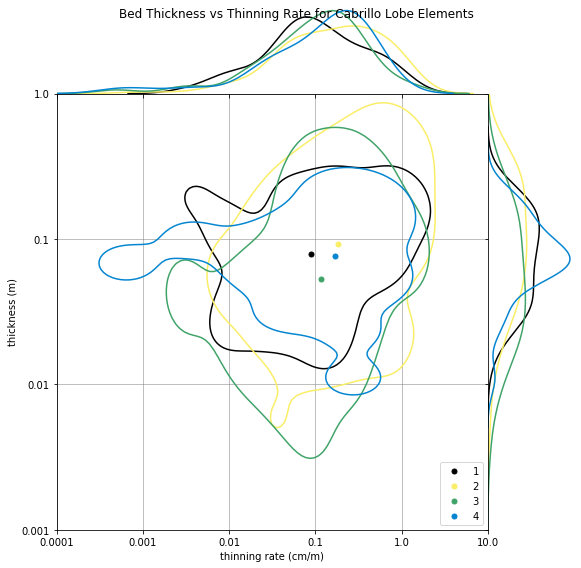

In [14]:
xlab="thinning rate (cm/m)"
ylab="thickness (m)"
# thinning rate is x axis
# thickness is y axis

colors = ["black", "xkcd:yellowish" , "xkcd:greenish", "xkcd:cerulean"]
ncolor = 0

g = sns.JointGrid("tr", "th", df, size=8, space=0)

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)
    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=colors[ncolor], s=25)
    # now plot the 2D contour map
    density_contour.bivar_kde_contour(values["tr"], values["th"], frac=0.9, ax=g.ax_joint, color=colors[ncolor])
    ncolor+=1

xlim=[-6,-1]
ylim=[-3,0]

g.fig.suptitle('Bed Thickness vs Thinning Rate for Cabrillo Lobe Elements')
g.ax_joint.legend('1234',loc='lower right') #not the best way, but it works
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 
xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 
ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 

## Make plots for paper (need to make into one subplot)

In [ ]:
xlab="thinning rate (cm/m)"
ylab="thickness (m)"

# specify export file name
figname="PL_TH_TR_Data"

# thinning rate is x axis
# thickness is y axis

g = sns.JointGrid("tr", "th", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["th"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)

    ncolor+=1

xlim=[-6,-1]
ylim=[-3,0]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 

xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 

#plt.savefig(figname + ".pdf", transparent=True)

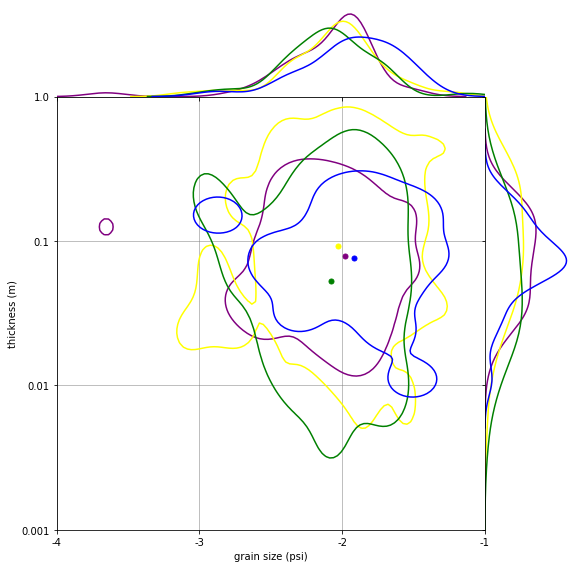

In [5]:
xlab="grain size (psi)"
ylab="thickness (m)"

# specify export file name
figname="PL_TH_GS_Data"

# grain size is x axis
# thickness is y axis

g = sns.JointGrid("gs", "th", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["gs"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["gs"].median(),values["th"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["gs"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)
    
    ncolor+=1
    
xlim=[-4,-1]
ylim=[-3,0]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticklabels(xticklabel)

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 

plt.savefig(figname + ".pdf", transparent=True)


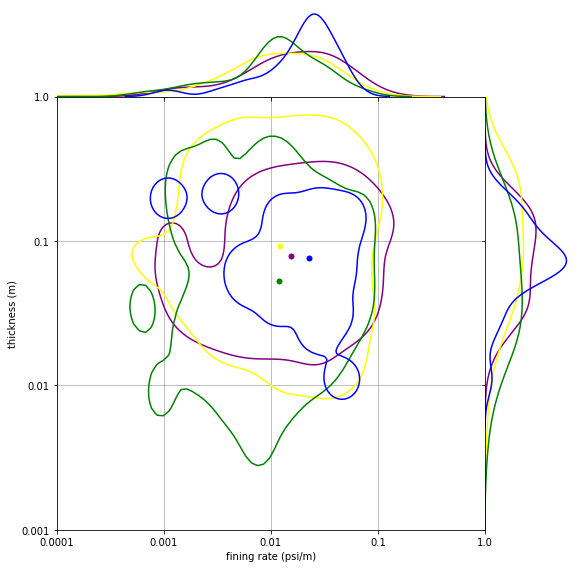

In [6]:
xlab="fining rate (psi/m)"
ylab="thickness (m)"

# specify export file name
figname="PL_TH_FR_Data"

# fining rate is x axis
# thickness is y axis

g = sns.JointGrid("fr", "th", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["fr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["th"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["fr"].median(),values["th"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["fr"], values["th"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)
    
    ncolor+=1
    
    
xlim=[-4,0]
ylim=[-3,0]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0],xlim[1]+1,1)
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel))

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 

plt.savefig(figname + ".pdf", transparent=True)


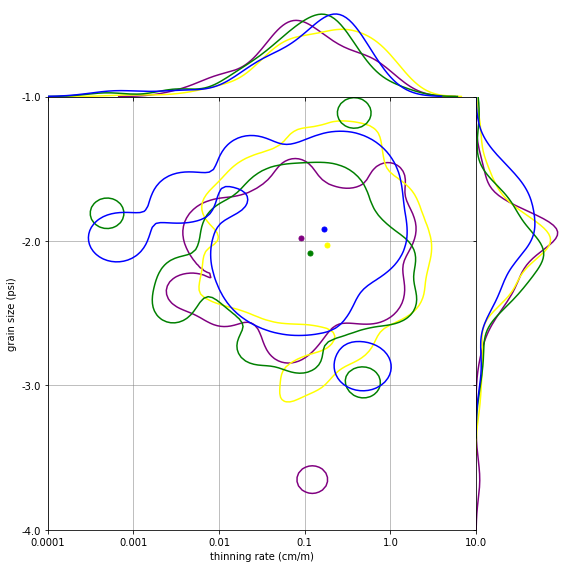

In [7]:
xlab="thinning rate (cm/m)"
ylab="grain size (psi)"

# specify export file name
figname="PL_TR_GS_Data"

# thinning rate is x axis
# grain size is y axis

g = sns.JointGrid("tr", "gs", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["gs"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["gs"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["gs"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)
    
    ncolor+=1
    
xlim=[-6,-1]
ylim=[-4,-1]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel))

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(yticklabel)

plt.savefig(figname + ".pdf", transparent=True)


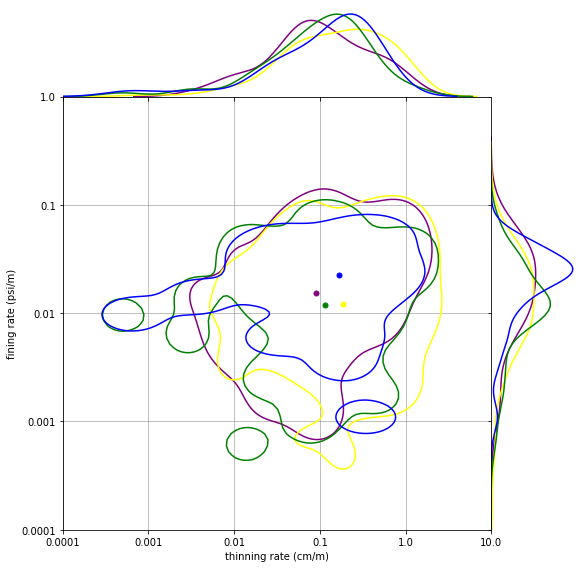

In [8]:
xlab="thinning rate (cm/m)"
ylab="fining rate (psi/m)"

# specify export file name
figname="PL_TR_FR_Data"

# thinning rate is x axis
# fining rate is y axis

g = sns.JointGrid("tr", "fr", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["tr"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["fr"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["tr"].median(),values["fr"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["tr"], values["fr"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)
    
    ncolor+=1
    
xlim=[-6,-1]
ylim=[-4,0]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0]+2,xlim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(np.power(10,xticklabel))

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel))

plt.savefig(figname + ".pdf", transparent=True)

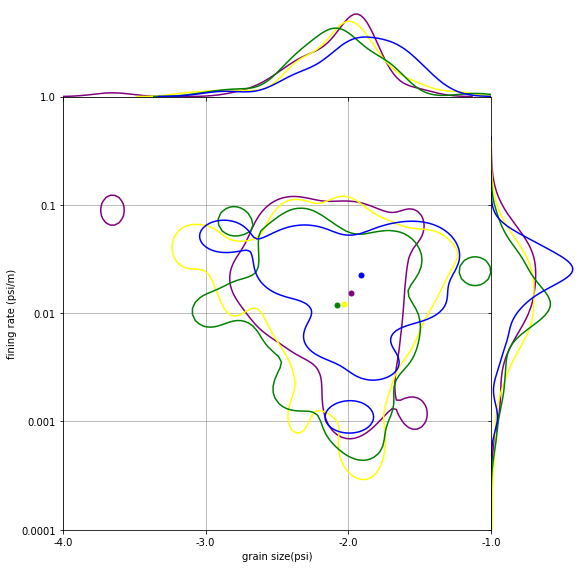

In [9]:
xlab="grain size(psi)"
ylab="fining rate (psi/m)"

# specify export file name
figname="PL_GS_FR_Data"

# grain size is x axis
# fining rate is y axis

g = sns.JointGrid("gs", "fr", df, size=8, space=0)

colors = ["purple", "yellow" , "green", "blue"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["gs"], ax=g.ax_marg_x, color=colors[ncolor], shade=False, legend=False)
    sns.kdeplot(values["fr"], ax=g.ax_marg_y, color=colors[ncolor], vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["gs"].median(),values["fr"].median(), color=colors[ncolor], s=25)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["gs"], values["fr"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1)
    
    ncolor+=1
    
xlim=[-4,-1]
ylim=[-4,0]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xtick=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticks(xtick) 
xticklabel=np.arange(xlim[0],xlim[1]+1,1)
xticklabel=xticklabel.astype(float)
g.ax_joint.set_xticklabels(xticklabel)

ytick=np.arange(ylim[0],ylim[1]+1,1)
g.ax_joint.set_yticks(ytick) 
yticklabel=np.arange(ylim[0],ylim[1]+1,1) 
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel))

plt.savefig(figname + ".pdf", transparent=True)
